# Carga de librerías necesarias

Antes de comenzar con cualquier análisis o implementación, es crucial cargar las librerías necesarias en nuestro entorno de trabajo. Estas librerías proporcionarán las funciones y herramientas que utilizaremos a lo largo del proceso. A continuación, se presentan las librerías que se cargarán:

- **Pandas**: Para la manipulación y análisis de datos.
- **NumPy**: Para operaciones numéricas y matriciales eficientes.
- **Matplotlib**: Para visualización de datos estática.
- **Seaborn**: Para visualización de datos estadísticos.
- **Scikit-learn**: Análisis de datos.

Ahora procederemos a cargar estas librerías en nuestro entorno de trabajo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

# Lectura de datos desde un archivo CSV

A continuación, se presenta el código para leer datos desde un archivo CSV utilizando la librería Pandas. En este caso, el archivo CSV se encuentra ubicado en la ruta "../Datos/ObesityDataSet_raw_and_data_sinthetic.csv". 

In [2]:

ruta_archivo = "../Datos/ObesityDataSet_raw_and_data_sinthetic.csv"

df = pd.read_csv(ruta_archivo)

df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Resumen de la Base de Datos

El resumen de la base de datos proporciona información sobre la estructura y el contenido de los datos. A continuación se presenta un resumen de la base de datos:

- **Número de Filas y Columnas:** La base de datos contiene un total de 2111 filas y 17 columnas.
  
- **Tipos de Datos de las Columnas:** La base de datos contiene columnas con diferentes tipos de datos:
  - 8 columnas son de tipo `float64`, que generalmente representan valores numéricos de punto flotante.
  - 9 columnas son de tipo `object`, que generalmente representan valores de texto u otros tipos de datos no numéricos.

- **Información sobre las Columnas:**
  1. **Gender:** Género de los individuos (Hombre, Mujer).
  2. **Age:** Edad de los individuos.
  3. **Height:** Altura de los individuos.
  4. **Weight:** Peso de los individuos.
  5. **family_history_with_overweight:** Historial familiar de sobrepeso (Sí, No).
  6. **FAVC:** Consumo frecuente de alimentos altamente calóricos (Sí, No).
  7. **FCVC:** Consumo de vegetales por día.
  8. **NCP:** Consumo de alimentos principales por día.
  9. **CAEC:** Consumo de comida entre comidas (Frecuente, Algunas veces, Siempre, No).
  10. **SMOKE:** Hábito de fumar (Sí, No).
  11. **CH2O:** Consumo de agua diario.
  12. **SCC:** Consumo de alcohol (Sí, No).
  13. **FAF:** Actividad física semanal.
  14. **TUE:** Tiempo de uso de dispositivos electrónicos diario.
  15. **CALC:** Consumo de alcohol actual (Frecuente, Algunas veces, Siempre, No).
  16. **MTRANS:** Modo de transporte (Automóvil, Moto, Bicicleta, Transporte público, A pie).
  17. **NObeyesdad:** Clase de obesidad (Objetivo de predicción).

- **Valores no Nulos por Columna:** Todas las columnas contienen 2111 valores no nulos, lo que indica que no hay datos faltantes en la base de datos.

- **Uso de Memoria:** La base de datos utiliza aproximadamente 280.5 KB de memoria.


In [3]:
# Información general del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Estadísticas Descriptivas para Variables Numéricas

Las estadísticas descriptivas proporcionan resúmenes numéricos que describen las características principales de un conjunto de datos. A continuación se presentan las estadísticas descriptivas para las variables numéricas de la base de datos:

- **Edad (Age):**
  - **Conteo:** Se tienen datos de edad para 2111 individuos.
  - **Media:** La edad promedio es de aproximadamente 24.31 años.
  - **Desviación Estándar:** La desviación estándar de la edad es de aproximadamente 6.35 años.
  - **Mínimo:** La edad mínima registrada es de 14 años.
  - **Percentil 25 (25%):** El 25% de los individuos tienen una edad igual o inferior a 19.95 años.
  - **Mediana (50%):** La mediana de la edad es de aproximadamente 22.78 años.
  - **Percentil 75 (75%):** El 75% de los individuos tienen una edad igual o inferior a 26 años.
  - **Máximo:** La edad máxima registrada es de 61 años.

- **Altura (Height):**
  - **Conteo:** Se tienen datos de estatura para 2111 individuos.
  - **Media:** La edad promedio es de aproximadamente 1.70 metros de estatura.
  - **Desviación Estándar:** La desviación estándar de la edad es de aproximadamente 0.093 metros.
  - **Mínimo:** La edad mínima registrada es de 1.45 metris de estatura.
  - **Percentil 25 (25%):** El 25% de los individuos tienen una edad igual o inferior a 1.63 metros.
  - **Mediana (50%):** La mediana de la edad es de aproximadamente 1.70 metros.
  - **Percentil 75 (75%):** El 75% de los individuos tienen una edad igual o inferior a 1.76 metros.
  - **Máximo:** La edad máxima registrada es de 1.98 metros de estatura.

- **Peso (Weight):**
  - **Conteo:** Se tienen datos de peso para 2111 individuos.
  - **Media:** La edad promedio es de aproximadamente 86.58 kg.
  - **Desviación Estándar:** La desviación estándar de la edad es de aproximadamente 26.19 kg.
  - **Mínimo:** La edad mínima registrada es de 39 kg.
  - **Percentil 25 (25%):** El 25% de los individuos tienen una edad igual o inferior a 65.47 kg.
  - **Mediana (50%):** La mediana de la edad es de aproximadamente 83 kg.
  - **Percentil 75 (75%):** El 75% de los individuos tienen una edad igual o inferior a 107.43 kg.
  - **Máximo:** La edad máxima registrada es de 173 kg.

Estas estadísticas descriptivas proporcionan información importante sobre la distribución y la dispersión de las variables numéricas en la base de datos, lo que ayuda a comprender mejor la naturaleza de los datos y a identificar posibles patrones o tendencias.


In [4]:
# Estadísticas descriptivas para las variables numéricas
df_numerico = df.select_dtypes(include=[np.number])
df_numerico.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
# Estadísticas descriptivas para las variables categóricas
df_categorico = df.select_dtypes(include=[object])  # Cambia np.object por object

for col in df_categorico.columns:
    print(df_categorico[col].value_counts())


Gender
Male      1068
Female    1043
Name: count, dtype: int64
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


# Análisis Variables Numéricas

Para mejorar la claridad visual y comprender mejor la distribución de los datos, se han creado histogramas individuales para cada variable numérica en el conjunto de datos. Si bien las distribuciones de las variables de edad, peso y estatura son comprensibles, otras variables numéricas como:

- **FCVC (Consumo de Vegetales por Día)**
- **NCP (Consumo de Alimentos Principales por Día)**
- **CH2O (Consumo de Agua Diario)**
- **FAF (Actividad Física Semanal)**
- **TUE (Tiempo de Uso de Dispositivos Electrónicos Diario)**

Llaman la atención debido a que aparentemente deberían ser variables enteras, pero están representadas con valores continuos. Este comportamiento inusual puede deberse a errores en la generación de datos, especialmente considerando que la información se generó sintéticamente. Por lo tanto, es necesario abordar este problema para corregir la naturaleza de estas variables y garantizar que reflejen adecuadamente los comportamientos esperados en el mundo real.


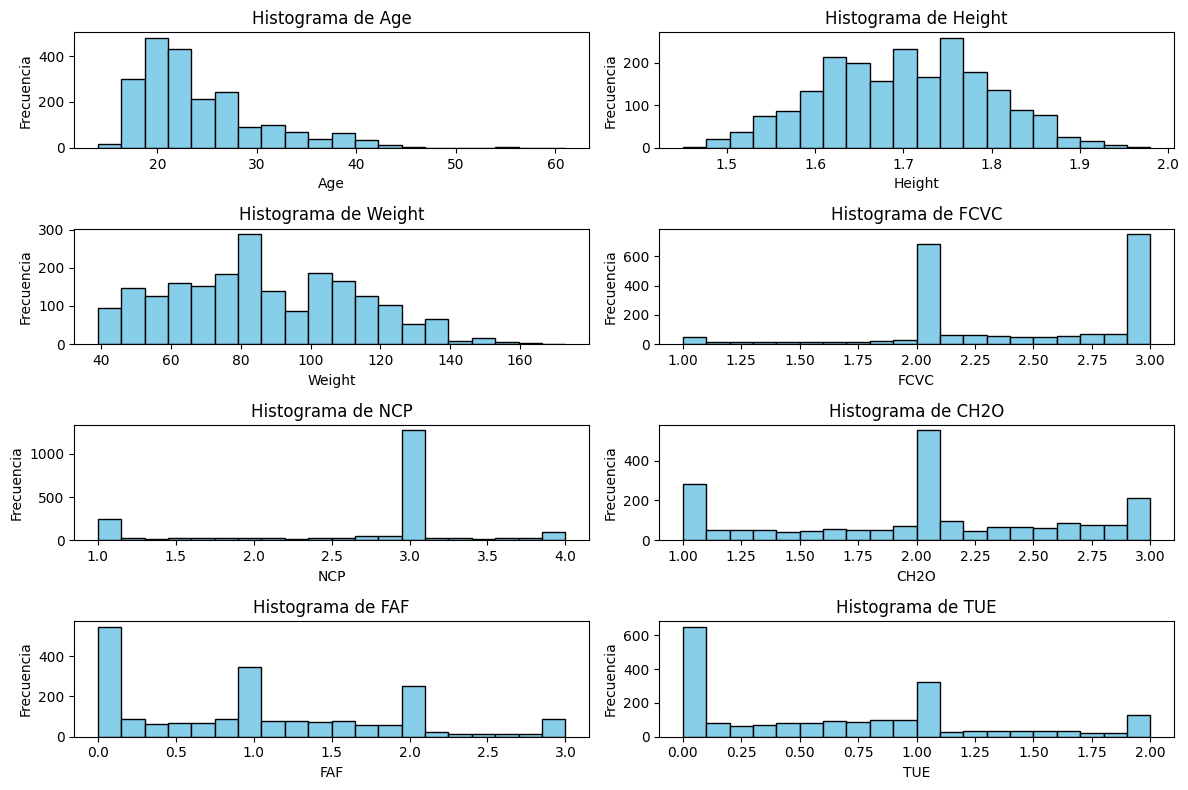

In [6]:
# Crear una lista con los nombres de las columnas numéricas
columnas_numericas = df_numerico.columns

# Definir el tamaño de la grilla
filas = 4
columnas = 2

# Crear la figura y los ejes utilizando subplots
fig, axs = plt.subplots(filas, columnas, figsize=(12, 8))

# Aplanar la matriz de ejes para iterar sobre ella más fácilmente
axs = axs.flatten()

# Iterar sobre las columnas numéricas y crear los histogramas
for i, columna in enumerate(columnas_numericas):
    # Seleccionar el eje actual
    ax = axs[i]
    
    # Crear el histograma para la columna actual
    ax.hist(df_numerico[columna], bins=20, color='skyblue', edgecolor='black')
    
    # Agregar etiquetas y título
    ax.set_title(f'Histograma de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la grilla de histogramas
plt.show()

In [7]:
# Redondear las columnas al entero más próximo
df['FCVC'] = df['FCVC'].round()
df['NCP'] = df['NCP'].round()
df['CH2O'] = df['CH2O'].round()
df['FAF'] = df['FAF'].round()
df['TUE'] = df['TUE'].round()

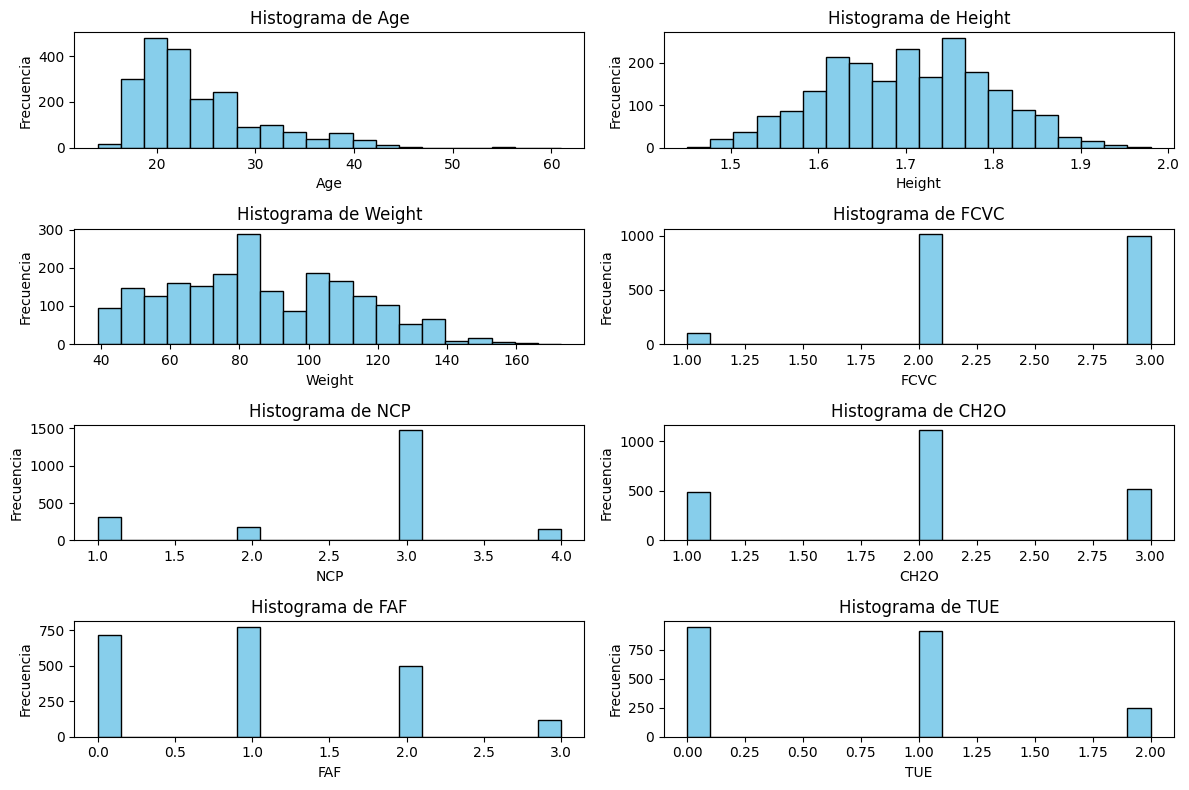

In [8]:
# Estadísticas descriptivas para las variables numéricas
df_numerico = df.select_dtypes(include=[np.number])

# Crear una lista con los nombres de las columnas numéricas
columnas_numericas = df_numerico.columns

# Definir el tamaño de la grilla
filas = 4
columnas = 2

# Crear la figura y los ejes utilizando subplots
fig, axs = plt.subplots(filas, columnas, figsize=(12, 8))

# Aplanar la matriz de ejes para iterar sobre ella más fácilmente
axs = axs.flatten()

# Iterar sobre las columnas numéricas y crear los histogramas
for i, columna in enumerate(columnas_numericas):
    # Seleccionar el eje actual
    ax = axs[i]
    
    # Crear el histograma para la columna actual
    ax.hist(df_numerico[columna], bins=20, color='skyblue', edgecolor='black')
    
    # Agregar etiquetas y título
    ax.set_title(f'Histograma de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la grilla de histogramas
plt.show()

In [9]:
# Correlaciones entre las variables numéricas
corr = df_numerico.corr()
print(corr)

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.005366 -0.043367 -0.024635 -0.132737   
Height -0.025958  1.000000  0.463136 -0.053772  0.244055  0.180895  0.290594   
Weight  0.202560  0.463136  1.000000  0.178952  0.103273  0.186316 -0.047948   
FCVC    0.005366 -0.053772  0.178952  1.000000  0.011111  0.061140  0.013661   
NCP    -0.043367  0.244055  0.103273  0.011111  1.000000  0.063477  0.130322   
CH2O   -0.024635  0.180895  0.186316  0.061140  0.063477  1.000000  0.118205   
FAF    -0.132737  0.290594 -0.047948  0.013661  0.130322  0.118205  1.000000   
TUE    -0.285801  0.058097 -0.039376 -0.077269  0.013010 -0.029207  0.055513   

             TUE  
Age    -0.285801  
Height  0.058097  
Weight -0.039376  
FCVC   -0.077269  
NCP     0.013010  
CH2O   -0.029207  
FAF     0.055513  
TUE     1.000000  


# Interpretación de la Matriz de Correlaciones

Para una mejor lectura se realiza una gráfica de calor de la matriz de correlaciones muestra la relación lineal entre pares de variables en el conjunto de datos. Cada celda de la matriz contiene el coeficiente de correlación de Pearson, que varía de -1 a 1. 

- **Age (Edad)**: Presenta una correlación positiva moderada con el **peso** (0.202) y una correlación negativa moderada con el **tiempo de uso de dispositivos electrónicos (TUE)** (-0.286).
- **Height (Altura)**: Muestra una correlación moderadamente positiva con el **peso** (0.463) y con el **consumo de alimentos principales por día (NCP)** (0.244).
- **Weight (Peso)**: Tiene una correlación moderadamente positiva con la **altura** (0.463) y una correlación ligeramente positiva con el **consumo de agua diario (CH2O)** (0.186).
- **FCVC (Consumo de Vegetales por Día)**: Muestra una correlación positiva débil con el **peso** (0.179).
- **NCP (Consumo de Alimentos Principales por Día)**: Presenta una correlación moderadamente positiva con la **altura** (0.244).
- **CH2O (Consumo de Agua Diario)**: Tiene una correlación ligeramente positiva con el **peso** (0.186) y una correlación débil con el **consumo de alimentos principales por día (NCP)** (0.063).
- **FAF (Actividad Física Semanal)**: Muestra una correlación moderadamente positiva con la **altura** (0.291) y una correlación débil con la **edad** (-0.133).
- **TUE (Tiempo de Uso de Dispositivos Electrónicos Diario)**: Presenta una correlación negativa moderada con la **edad** (-0.286).

Estas correlaciones proporcionan información sobre cómo las diferentes variables están relacionadas entre sí en el conjunto de datos.


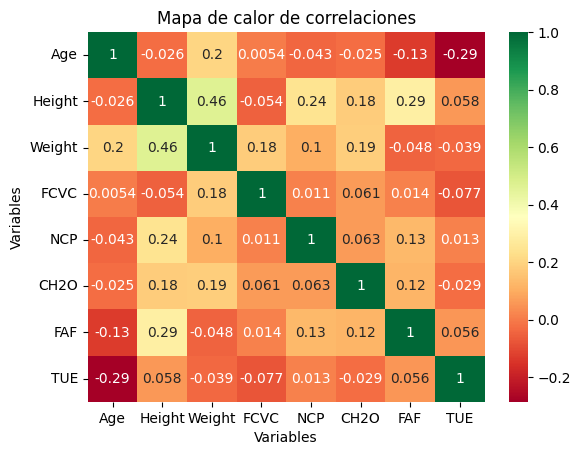

In [10]:
# Calcular la matriz de correlaciones
corr = df_numerico.corr()

# Crear el mapa de calor
sns.heatmap(corr, annot=True, cmap='RdYlGn')

# Añadir título y etiquetas
plt.title('Mapa de calor de correlaciones')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el gráfico
plt.show()

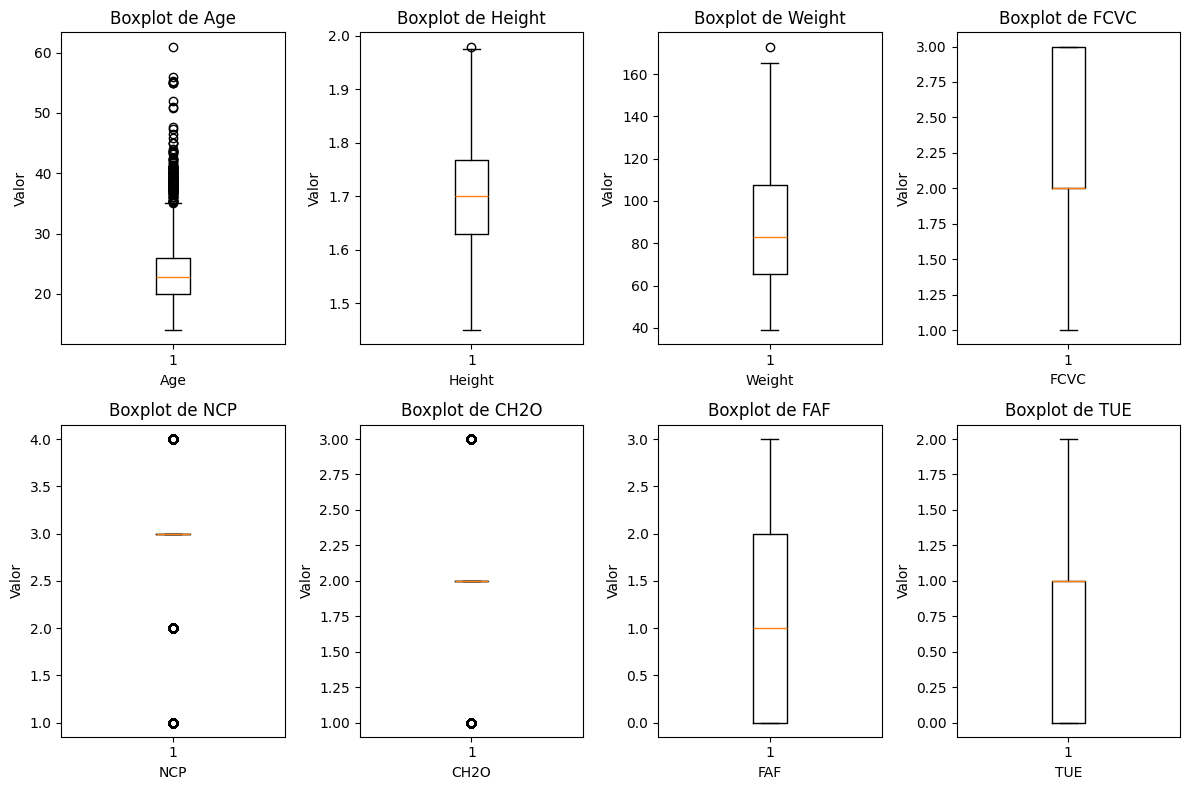

In [11]:
# Crear una lista con los nombres de las columnas numéricas
columnas_numericas = df_numerico.columns

# Definir el tamaño de la grilla
filas = 2
columnas = 4

# Crear la figura y los ejes utilizando subplots
fig, axs = plt.subplots(filas, columnas, figsize=(12, 8))

# Aplanar la matriz de ejes para iterar sobre ella más fácilmente
axs = axs.flatten()

# Iterar sobre las columnas numéricas y crear los boxplots
for i, columna in enumerate(columnas_numericas):
    # Seleccionar el eje actual
    ax = axs[i]
    
    # Crear el boxplot para la columna actual
    ax.boxplot(df_numerico[columna])
    
    # Agregar etiquetas y título
    ax.set_title(f'Boxplot de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Valor')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la grilla de boxplots
plt.show()

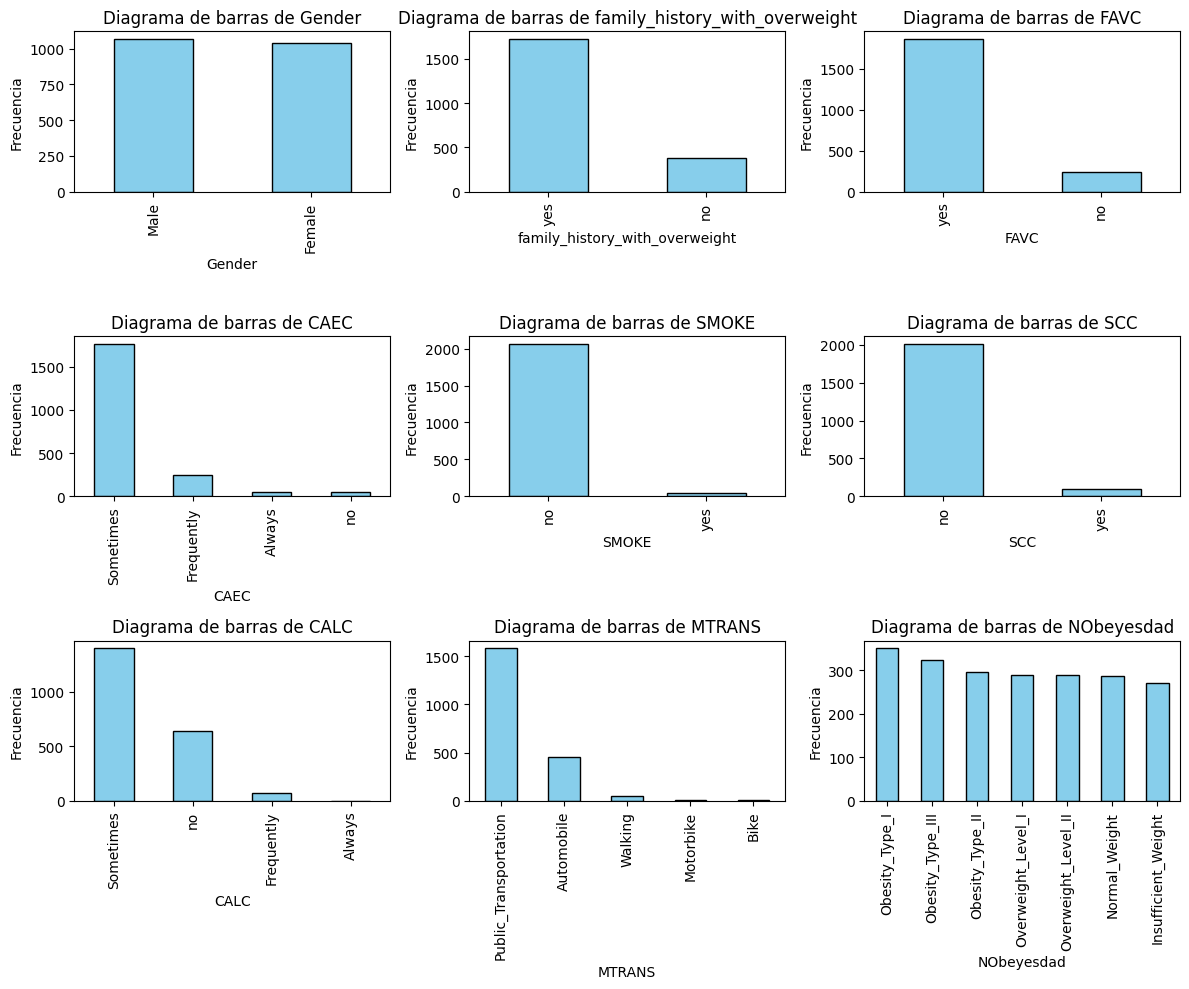

In [12]:
# Obtener una lista de las columnas categóricas
columnas_categoricas = df_categorico.columns

# Definir el tamaño de la grilla
filas = 3
columnas = 3

# Crear la figura y los ejes utilizando subplots
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))

# Aplanar la matriz de ejes para iterar sobre ella más fácilmente
axs = axs.flatten()

# Iterar sobre las columnas categóricas y crear los diagramas de barras
for i, columna in enumerate(columnas_categoricas):
    # Seleccionar el eje actual
    ax = axs[i]
    
    # Contar la frecuencia de cada categoría y crear el diagrama de barras
    df_categorico[columna].value_counts().plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    
    # Agregar etiquetas y título
    ax.set_title(f'Diagrama de barras de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la grilla de diagramas de barras
plt.show()

In [13]:
# Calcular el Z-Score para cada punto de datos en una columna específica
def zscore_outliers(column):
    z_scores = (column - column.mean()) / column.std()
    return column[np.abs(z_scores) > 3]

# Aplicar la función a cada columna numérica en el DataFrame
outliers = df_numerico.apply(zscore_outliers)

# Mostrar los valores atípicos encontrados
print("Valores atípicos:")
print(outliers)

Valores atípicos:
            Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
21    52.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
92    55.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
133   61.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
137   44.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
161   55.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
169   45.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
232   51.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
252   56.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
344         NaN     NaN   173.0   NaN  NaN   NaN  NaN  NaN
492   45.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1013  55.246250     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1034  50.832559     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1063  45.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1088  55.137881     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1101  46.491859     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1158  55.022494     NaN     NaN   NaN 

Luego de la descripción de los datos, es necesario ajustar el dataframe para que esté de manera óptima para implementar de manera correcta los diferentes modelos de Machine Learning y evitar errores por estos motivos. Esto implica realizar diversas tareas de preprocesamiento de datos, como la codificación de variables categóricas, la normalización o estandarización de características numéricas, entre otros. 

Al realizar estos ajustes, se garantiza que el conjunto de datos esté en un formato adecuado para que los algoritmos de aprendizaje puedan procesarlo de manera efectiva y generar modelos precisos. Además, la preparación adecuada de los datos contribuye a reducir el riesgo de sesgos y errores durante el proceso de modelado, lo que conduce a resultados más confiables y generalizables.

Es fundamental realizar este paso inicial de preparación de datos con cuidado y atención, ya que la calidad de los modelos de Machine Learning depende en gran medida de la calidad y la preparación de los datos utilizados para entrenarlos y evaluarlos.


In [14]:
# Crear variables dummy para la columna "MTRANS"
df = pd.get_dummies(df, columns=['MTRANS'], dtype=int)

# Ahora el DataFrame df tendrá nuevas columnas dummy para cada valor único de "MTRANS"

# Para verificar el resultado
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,no,0.0,1.0,no,Normal_Weight,0,0,0,1,0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,yes,3.0,0.0,Sometimes,Normal_Weight,0,0,0,1,0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,no,2.0,1.0,Frequently,Normal_Weight,0,0,0,1,0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,no,2.0,0.0,Frequently,Overweight_Level_I,0,0,0,0,1
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,no,0.0,0.0,Sometimes,Overweight_Level_II,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,no,2.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0


In [15]:
# Definimos una clase DataFrameTransformer para envolver el transformador de columna
class DataFrameTransformer(TransformerMixin):
    def __init__(self, transformer):
        self.transformer = transformer

    def fit(self, X, y=None):
        self.transformer.fit(X)
        return self

    def transform(self, X):
        transformed_data = self.transformer.transform(X)
        transformed_df = pd.DataFrame(transformed_data, columns=self.transformer.get_feature_names_out())
        remaining_cols = [col for col in X.columns if col not in self.transformer.named_transformers_['onehot'].get_feature_names_out()]
        remaining_df = X[remaining_cols]
        return pd.concat([transformed_df, remaining_df], axis=1)

# Supongamos que tienes un DataFrame llamado df que contiene las variables mencionadas

# Definir las columnas que deseas codificar
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC']

# Definir el transformador de columnas
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), categorical_cols)
], remainder='passthrough')  # Esto permitirá que las columnas no transformadas se pasen directamente

# Crear el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', DataFrameTransformer(column_transformer))
])

# Aplicar el pipeline a tus datos
transformed_data = pipeline.fit_transform(df)

In [16]:
transformed_data

,onehot__Gender_Female,onehot__Gender_Male,onehot__family_history_with_overweight_no,onehot__family_history_with_overweight_yes,onehot__FAVC_no,onehot__FAVC_yes,onehot__CAEC_Always,onehot__CAEC_Frequently,onehot__CAEC_Sometimes,onehot__CAEC_no,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,no,0.0,1.0,no,Normal_Weight,0,0,0,1,0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,yes,3.0,0.0,Sometimes,Normal_Weight,0,0,0,1,0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,no,2.0,1.0,Frequently,Normal_Weight,0,0,0,1,0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,no,2.0,0.0,Frequently,Overweight_Level_I,0,0,0,0,1
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,no,0.0,0.0,Sometimes,Overweight_Level_II,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,no,2.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0
2107,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,no,1.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0
2108,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,no,1.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0
2109,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,no,1.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0


In [17]:
# Guardar el DataFrame como archivo CSV
transformed_data.to_csv('../Datos/transformed_data.csv', index=False)

## Análisis de Agrupamiento

Según los gráficos se puede interpretar lo siguiente:

- El gráfico del método del codo muestra la suma de cuadrados residuales dentro de los clústeres (WCSS). Se puede observar que a medida que aumenta el número de clústeres, el WCSS disminuye. La disminución más pronunciada ocurre alrededor de 4 clústeres, lo que sugiere que 4 podría ser un número apropiado de clústeres para esta agrupación.

- Por otro lado en el gráfico 3D muestra los 4 clústeres identificados y cómo se agrupan las observaciones en base a las variables Edad, TUE y CH2O. Cada clúster se representa con un color diferente y se puede apreciar la separación entre ellos en el espacio tridimensional. Se puede ver una separación marcada en los grupos sobre todo por la variable TUE.

En resumen, los gráficos y la salida de datos permiten visualizar y analizar la agrupación de observaciones en 4 clústeres distintos, basados en características relacionadas con la obesidad y otros factores de riesgo. Esta información podría ser útil para comprender patrones y perfiles de riesgo en una población determinada.


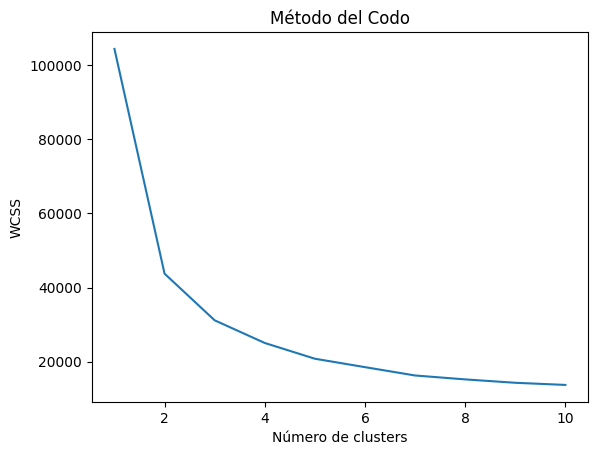

               Age    Height     Weight      FCVC       NCP      CH2O  \
Cluster                                                                 
0        40.432093  1.658357  86.037035  2.342922  2.607081  1.883728   
1        19.524785  1.699399  77.816511  2.406617  2.713341  1.992670   
2        31.417069  1.740101  96.000418  2.384840  2.622625  1.850720   
3        24.414766  1.699595  94.687243  2.464909  2.690091  2.114729   

              FAF       TUE   Gender2  family_history_with_overweight2  ...  \
Cluster                                                                 ...   
0        0.838028  0.187326  0.398734                         0.917722  ...   
1        1.213762  0.788048  0.452830                         0.701258  ...   
2        0.970989  0.508299  0.744526                         0.937956  ...   
3        0.794966  0.645636  0.508966                         0.903448  ...   

           SMOKE2      SCC2     CALC2   MTRANS2     FCVC2      TUE2      NCP2  \
Clust

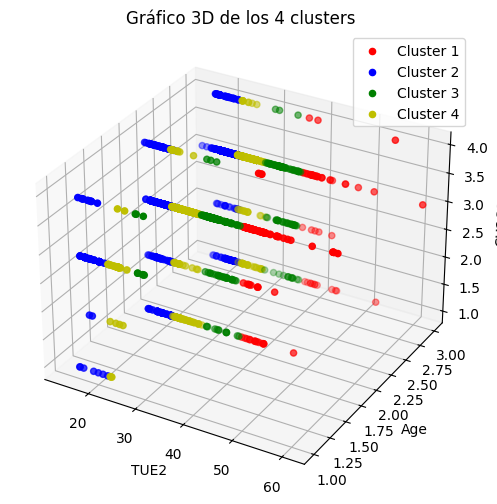

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
 
ruta_bd = "../Datos/ObesityDataSet_raw_and_data_sinthetic.csv"
 
datoss = pd.read_csv(ruta_bd)
 
encoder = LabelEncoder()
datoss['Gender2'] = encoder.fit_transform(datoss['Gender'])
datoss['family_history_with_overweight2'] = encoder.fit_transform(datoss['family_history_with_overweight'])
datoss['FAVC2'] = encoder.fit_transform(datoss['FAVC'])
datoss['CAEC2'] = encoder.fit_transform(datoss['CAEC'])
datoss['SMOKE2'] = encoder.fit_transform(datoss['SMOKE'])
datoss['SCC2'] = encoder.fit_transform(datoss['SCC'])
datoss['CALC2'] = encoder.fit_transform(datoss['CALC'])
datoss['MTRANS2'] = encoder.fit_transform(datoss['MTRANS'])
datoss['FCVC2'] = round(datoss['FCVC'], 0)
datoss['TUE2'] = round(datoss['TUE'], 0)
datoss['NCP2'] = round(datoss['NCP'], 0)
datoss['CH2O2'] = round(datoss['CH2O'], 0)
datoss['FAF2'] = round(datoss['FAF'], 0)
datoss['NObeyesdad2'] = encoder.fit_transform(datoss['NObeyesdad'])
 
# Seleccionar las variables de interés
variables = ['Age', 'FCVC2', 'NCP2', 'CH2O2', 'FAF2', 'TUE2','Gender2',
             'family_history_with_overweight2','FAVC2','CAEC2','SMOKE2',
             'SCC2','CALC2','MTRANS2','NObeyesdad2']
 
Xx = datoss [variables]
 
# Determinar el número óptimo de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Xx)
    wcss.append(kmeans.inertia_)
 
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()
 
# Aplicar K-means con el número óptimo de clusters
num_clusters = 4  # Sustituir por el número óptimo de clusters identificado
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(Xx)
etiquetas = kmeans.labels_

variables_a_eliminar = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS','NObeyesdad']

datoss = datoss.drop(variables_a_eliminar, axis=1)

# Agregar las etiquetas de los clusters al DataFrame original
datoss['Cluster'] = etiquetas
 
# Visualizar los resultados
print(datoss.groupby('Cluster').mean())
 
 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
# Filtrar los datos para los 4 clusters
cluster_1 = datoss[datoss['Cluster'] == 0]
cluster_2 = datoss[datoss['Cluster'] == 1]
cluster_3 = datoss[datoss['Cluster'] == 2]
cluster_4 = datoss[datoss['Cluster'] == 3]
 
# Crear una figura 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
 
# Graficar los 4 clusters en 3D
ax.scatter(cluster_1[variables[0]], cluster_1[variables[1]], cluster_1[variables[2]], c='r', label='Cluster 1')
ax.scatter(cluster_2[variables[0]], cluster_2[variables[1]], cluster_2[variables[2]], c='b', label='Cluster 2')
ax.scatter(cluster_3[variables[0]], cluster_3[variables[1]], cluster_3[variables[2]], c='g', label='Cluster 3')
ax.scatter(cluster_4[variables[0]], cluster_4[variables[1]], cluster_4[variables[2]], c='y', label='Cluster 4')
 
# Agregar etiquetas y leyenda
ax.set_xlabel(variables[5])
ax.set_ylabel(variables[0])
ax.set_zlabel(variables[3])
ax.set_title('Gráfico 3D de los 4 clusters')
ax.legend()
 
# Mostrar el gráfico
plt.show()
